In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
pylab.rcParams.update(params)

gmx_surface_areas = ['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns',
                 'SA19.5_100ns', 'SA19.5-2_20ns', 'SA19.5-3_20ns',
                 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns',
                 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 
                 'SA22_20ns', 'SA22-2_20ns', 'SA22-3_100ns', 
                 'SA24_20ns', 'SA24-2_20ns', 'SA24-3_100ns']
namd_surface_areas = ['SA19','SA19-2', 'SA19-3', 
                   'SA19.5','SA19.5-2', 'SA19.5-3',
                   'SA20','SA20-2', 'SA20-3',
                   'SA20.5', 'SA20.5-2', 'SA20.5-3',
                   'SA21','SA21-2', 'SA21-3',
                   'SA22','SA22-2', 'SA22-3',
                   'SA23','SA23-2', 'SA23-3',
                   'SA24', 'SA24-2', 'SA24-3']
namd_filenames = ['step7.1', 'step7.2', 'step7.21', 'step7.3', 'step7.31', 'step7.32', 'step7.33', 'step7.34',
               'step7.35','step7.4', 'step7.41', 'step7.42', 'step7.43', 'step7.44', 'step7.45']
gmx_filenames = []
for g in range(1,21):
    gmx_filenames.append('step9_'+str(g))
filedir_g = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/'
filedir_n = '/gpfs/amarolab/abbyflabby/MIX/MIX1234_NaCl0.4_NAMD/'
logfiles_n = []
logfiles_g = []
trr_files = []
dcd_files = []

for area in namd_surface_areas:
    logchunk = []
    dcdchunk = []
    for i in namd_filenames:
        log = Path(filedir_n+area+'/charmm-gui/namd/'+i+'_production.log')
        dcd = Path(filedir_n+area+'/charmm-gui/namd/'+i+'_production.dcd')
        if log.exists():
            logchunk.append(filedir_n+area+'/charmm-gui/namd/'+i+'_production.log')
        if dcd.exists():
            dcdchunk.append(filedir_n+area+'/charmm-gui/namd/'+i+'_production.dcd')
    if len(logchunk)>0:
        logfiles_n.append(logchunk)
        dcd_files.append(dcdchunk)
#xvgfiles = [] #list of xvg filenames
pres = []
times = []
areas = []
trr_files = []
#for narea in n_surface_areas:
#    logchunk = []
    
for area in gmx_surface_areas:
    xvgchunk = []
    trajchunk = []
    for i in range(1, 21):
        xvg = Path(filedir_g+area+'/step9_'+str(i)+'.xvg')
        traj = Path(filedir_g+area+'/step9_'+str(i)+'.trr')
        if xvg.exists():
            xvgchunk.append(filedir_g+area+'/step9_'+str(i)+'.xvg')
        if traj.exists():
            trajchunk.append(filedir_g+area+'/step9_'+str(i))
    #print(xvgchunk)
    for p, x in enumerate(xvgchunk):
        if p == 0:
            #arr = np.array(timesteps)
            #timesteps in nanoseconds
            timesteps = np.genfromtxt(x, dtype='float', skip_header=24)[:,0]/1000
            #np.append(timesteps, new_ts)
            pressures = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            #np.append(pressures, new_pr)
            #print(pressures)
        else:
            time = np.genfromtxt(x,dtype='float', skip_header=24)[:,0]/1000
            #print(time)
            timesteps = np.append(timesteps, time)
      #      #print(time)
      #      #t = time.tolist()
      #      timesteps.append(time)
      #      print(timesteps)
            pr = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            pressures = np.append(pressures, pr)
    if len(xvgchunk)>0:
        pres.append(70.5-np.array(pressures))
        times.append(timesteps)
        areas.append(area)
        logfiles_g.append(xvgchunk)
        trr_files.append(trajchunk)
print(trr_files)

In [3]:
traj19 = md.load('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/newtraj.trr', top='/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_1.gro')

selection = trr_files[0]
trrs = []
for s in selection:
    trrs.append(s+'.trr')
traj = md.load(trrs, top=selection[0]+'.gro')
print(traj)

In [17]:
poop = [atom.index for atom in traj19.top.atoms if traj19.xyz[0][atom.index][2] > 0 and atom.name == 'C1']
print(np.array(poop))
laup = [atom.index for atom in traj19.top.atoms if traj19.xyz[0][atom.index][2] > 0 and atom.name == 'C1' and atom.residue.name == 'LAUP']
#myrp = [atom.index for atom in traj.top.atoms if traj.xyz[0][atom.index][2] > 0 and atom.residue.name == 'MYRP']
#step = [atom.index for atom in traj.top.atoms if traj.xyz[0][atom.index][2] > 0 and atom.residue.name == 'STEP']

[    3    59   115   171   227   283   339   395   451   507   563   619
   675   731   787   843   899   955  1011  1067  1123  1179  1235  1291
  1347  1403  1459  1515  1571  1627  1683  1739  1795  1851  1907  1963
  2019  2075  2131  2187  2243  2299  2355  2411  2467  2523  2579  2635
  2691  2747  2803  2859  2915  2971  3027  3083  3139  3195  3251  3307
  3363  3419  3475  3531  3587  3643  3699  3755  3811  3867  3923  3979
  4035  4091  4147  4203  4259  4315  4371  4427  4483  4539  4595  4651
  4707  4763  4819  4875  4931  4987  5043  5099  5155  5211  5267  5323
  5379  5435  5491  5547  5603  5659  5715  5771  5827  5883  5939  5995
  6051  6107  6163  6219  6275  6331  6387  6437  6487  6537  6587  6637
  6687  6737  6787  6837  6887  6937  6987  7037  7087  7137  7187  7237
  7287  7337  7387  7437  7487  7537  7587  7637  7687  7737  7787  7837
  7887  7937  7987  8037  8087  8137  8187  8237  8287  8337  8387  8437
  8487  8537  8587  8637  8687  8737  8787  8837  8

In [18]:
#sel1 = traj.top.select("name 'C1'")
#print(sel1)
sel2 = traj19.top.select('water')
sel3 = traj19.top.select('resname SOD')

pairs = traj19.top.select_pairs(poop, sel2)
lauppairs = traj19.top.select_pairs(laup, sel2)
#myrppairs = traj.top.select_pairs(myrp, sel2)
#steppairs = traj.top.select_pairs(step, sel2)

In [19]:
hi = md.compute_rdf(traj19[-10:-1], pairs, r_range=(0.1, 10.0))
hi1 = md.compute_rdf(traj19[-10:-1], lauppairs, r_range=(0.1, 10.0))
#hi2 = md.compute_rdf(traj[-10:-1], myrppairs, r_range=(0.0, 10.0))
#hi3 = md.compute_rdf(traj[-10:-1], steppairs, r_range=(0.0, 10.0))

Text(0,0.5,u'G(r)')

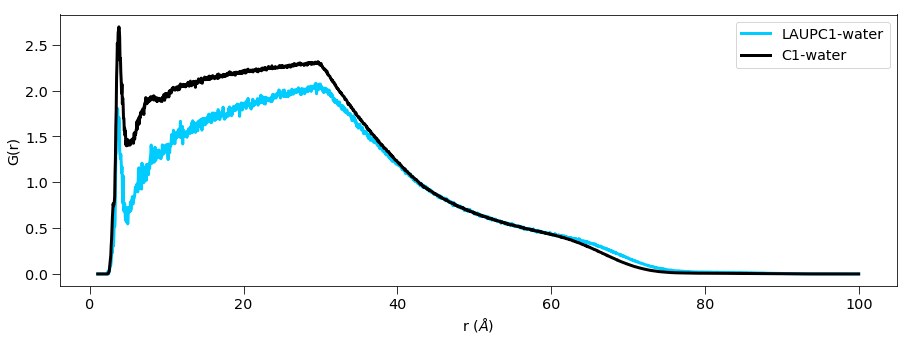

In [44]:
#print(hi)
plt.errorbar(hi1[0]*10,hi1[1], c=cy, label='LAUPC1-water', lw=3)
#plt.errorbar(hi2[0]*10,hi2[1], c=cy, label='MYRP', lw=3)
plt.errorbar(hi[0]*10,hi[1], c='k', label='C1-water', lw=3)
#plt.errorbar(hi3[0]*10,hi3[1], c=pi, label='STEP', lw=3)
plt.legend(loc=1)
plt.xlabel('r ($\AA$)')
plt.ylabel('G(r)')

In [25]:
pairs2 = traj19.top.select_pairs(poop, sel3)
lauppairs2 = traj19.top.select_pairs(laup, sel3)
#myrppairs2 = traj.top.select_pairs(myrp, sel3)
#steppairs2 = traj.top.select_pairs(step, sel3)

In [26]:
hiS = md.compute_rdf(traj19[-10:-1], pairs2, r_range=(0.0, 10.0))
hi1S = md.compute_rdf(traj19[-10:-1], lauppairs2, r_range=(0.0, 10.0))
#hi2S = md.compute_rdf(traj[-10:-1], myrppairs2, r_range=(0.0, 10.0))
#hi3S = md.compute_rdf(traj[-10:-1], steppairs2, r_range=(0.0, 10.0))

Text(0,0.5,u'G(r)')

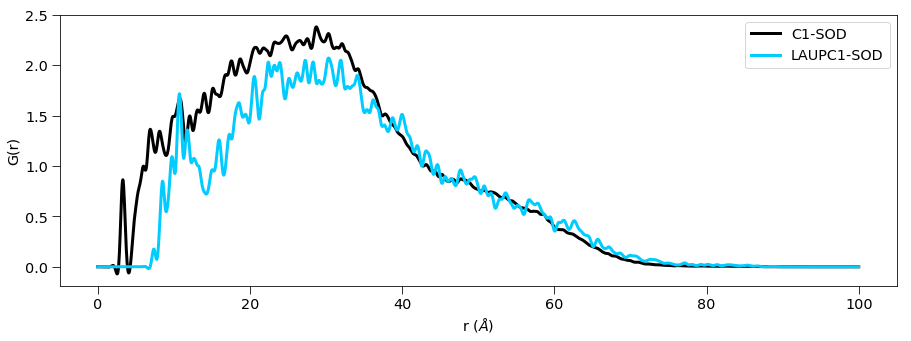

In [43]:
import scipy.signal as signal 

N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data_hiS = signal.filtfilt(B,A, hiS[1])
smooth_data_hi1S = signal.filtfilt(B, A, hi1S[1])

plt.errorbar(hiS[0]*10,smooth_data_hiS, c='k', label='C1-SOD', lw=3)
#plt.errorbar(hi2S[0]*10,hi2S[1], c=cy, alpha=0.5, label='MYRP', lw=3)
#plt.errorbar(hiS[0]*10,hiS[1], c=gr, alpha=0.5, label='PALP', lw=3)
plt.errorbar(hi1S[0]*10,smooth_data_hi1S, c=cy, label='LAUPC1-SOD', lw=3)
#plt.errorbar(hi1[0]*10,hi1[1], c=ora,label='LAUP-SOD',  lw=5)
#plt.errorbar(hi2[0]*10,hi2[1], c=cy, lw=3)
#plt.errorbar(hi[0]*10,hi[1], c=gr,  lw=3)
#plt.errorbar(hi3[0]*10,hi3[1], c=re, label='STEP-SOD', lw=5)
plt.legend(loc=1)
plt.xlabel('r ($\AA$)')
plt.ylabel('G(r)')

In [15]:
bl = '#0000ff'
pu = '#8c1aff'
bg = '#00cc66'
cy = '#00ccff'
pi = '#ff66ff'
re = '#990033'
ora = '#ff704d'
ye = '#ffff66'
gr = '#99ff99'
pal = [bl, pu, bg, cy, pi, re, ora, ye, gr]
black = '#000000'
yellow = '#F0F442'
orange = '#ec7f31'
#gold = '#E69F00'
gold = '#f0bd24'
green = '#009E73'
dblue = '#0072B2'
lblue = '#56B4E9'
pink = '#F6BBCA'
red = '#FF3442'
purple = '#4f0069'
lgreen = '#00ff99'
c = [purple, red, orange, gold, yellow, green, lgreen, dblue, lblue, pink]

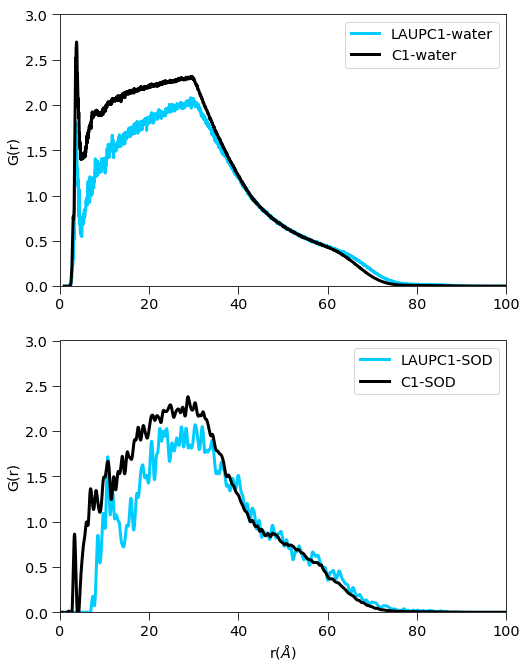

In [58]:
plt.figure(figsize=(8,11))
grid = plt.GridSpec(2, 1)
plt.subplot(grid[0,0])
plt.errorbar(hi1[0]*10,hi1[1], c=cy, label='LAUPC1-water', lw=3)
plt.errorbar(hi[0]*10,hi[1], c='k', label='C1-water', lw=3)
plt.ylim(0,3.0)
plt.xlim(0,100)
plt.ylabel('G(r)')
plt.legend(loc=1)

plt.subplot(grid[1,0])
plt.errorbar(hi1S[0]*10,smooth_data_hi1S, c=cy, label='LAUPC1-SOD', lw=3)
plt.errorbar(hiS[0]*10,smooth_data_hiS, c='k', label='C1-SOD', lw=3)
plt.ylim(0,3.0)
plt.xlim(0,100)
plt.ylabel('G(r)')
plt.xlabel('r($\AA$)')
plt.legend(loc=1)
plt.savefig('/home/adommer/Desktop/RDF.png', dpi=300)

In [59]:
traj195 = md.load('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/concat.trr', top='/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/step9_1.gro')

In [60]:
poop195 = [atom.index for atom in traj195.top.atoms if traj195.xyz[0][atom.index][2] > 0 and atom.name == 'C1']
#print(np.array(poop))
laup195 = [atom.index for atom in traj195.top.atoms if traj195.xyz[0][atom.index][2] > 0 and atom.name == 'C1' and atom.residue.name == 'LAUP']
#myrp = [atom.index for atom in traj.top.atoms if traj.xyz[0][atom.index][2] > 0 and atom.residue.name == 'MYRP']
#step = [atom.index for atom in traj.top.atoms if traj.xyz[0][atom.index][2] > 0 and atom.residue.name == 'STEP']

In [62]:
pairs195 = traj195.top.select_pairs(poop195, sel3)
lauppairs195 = traj195.top.select_pairs(laup195, sel3)
sel195_w = traj195.top.select('water')
sel195_s = traj195.top.select('resname SOD')

In [63]:
hi195_w = md.compute_rdf(traj195[-10:-1], pairs195, r_range=(0.0, 10.0))
hi195_s = md.compute_rdf(traj195[-10:-1], lauppairs195, r_range=(0.0, 10.0))

In [ ]:
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data_195_w = signal.filtfilt(B,A, hi195_w[1])
smooth_data_195_s = signal.filtfilt(B, A, hi195_s[1])

plt.errorbar(hiS[0]*10,smooth_data_195_s, c='k', label='C1-SOD', lw=3)
#plt.errorbar(hi2S[0]*10,hi2S[1], c=cy, alpha=0.5, label='MYRP', lw=3)
#plt.errorbar(hiS[0]*10,hiS[1], c=gr, alpha=0.5, label='PALP', lw=3)
plt.errorbar(hi1S[0]*10,smooth_data_195_w, c=cy, label='LAUPC1-SOD', lw=3)

In [2]:
laup = md.load('/gpfs/amarolab/monolayers/LAUP_NaCl0.4_GMX/SA20_100ns/step9_1.trr', top='/gpfs/amarolab/monolayers/LAUP_NaCl0.4_GMX/SA20_100ns/step9_1.gro')

In [4]:
mix1 = md.load('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/concat.trr', top='/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/step9_1.gro')

In [6]:
mix2 = md.load('/gpfs/amarolab/monolayers/MIX2_NaCl0.4_GMX/SA20_100ns/step9_1.trr', top='/gpfs/amarolab/monolayers/MIX2_NaCl0.4_GMX/SA20_100ns/step9_1_temp.gro')

In [7]:
mix3 = md.load('/gpfs/amarolab/monolayers/MIX3_NaCl0.4_GMX/SA20_100ns/step8_2.trr', top='/gpfs/amarolab/monolayers/MIX3_NaCl0.4_GMX/SA20_100ns/step9_1.gro')

In [45]:
C1L = [atom.index for atom in laup.top.atoms if atom.name == 'C1' and laup.xyz[0][atom.index][2] > 15]
C11 = [atom.index for atom in mix1.top.atoms if atom.name == 'C1' and mix1.xyz[0][atom.index][2] > 15]
C12 = [atom.index for atom in mix2.top.atoms if atom.name == 'C1' and mix2.xyz[0][atom.index][2] > 15]
C13 = [atom.index for atom in mix3.top.atoms if atom.name == 'C1' and mix3.xyz[0][atom.index][2] > 15]

In [46]:
trajL = laup.atom_slice(C1L)
traj1 = mix1.atom_slice(C11)
traj2 = mix2.atom_slice(C12)
traj3 = mix3.atom_slice(C13)

In [47]:
print(trajL)

<mdtraj.Trajectory with 10001 frames, 180 atoms, 180 residues, and unitcells>


In [18]:
wL = laup.top.select('resname SOD')
w1 = mix1.top.select('resname SOD')
w2 = mix2.top.select('resname SOD')
w3 = mix3.top.select('resname SOD')

In [19]:
sel_L = laup.top.select_pairs(C1L, wL)
sel_1 = mix1.top.select_pairs(C11, w1)
sel_2 = mix2.top.select_pairs(C12, w2)
sel_3 = mix3.top.select_pairs(C13, w3)

In [41]:
L = md.compute_rdf(laup[-5000:-1], sel_L, r_range=(0.0, 10.0))
mix1RDF = md.compute_rdf(mix1[-5000:-1], sel_1, r_range=(0.0, 10.0))
mix2RDF = md.compute_rdf(mix2[-5000:-1], sel_2, r_range=(0.0, 10.0))
mix3RDF = md.compute_rdf(mix3[-5000:-1], sel_3, r_range=(0.0, 10.0))

(0, 3.5)

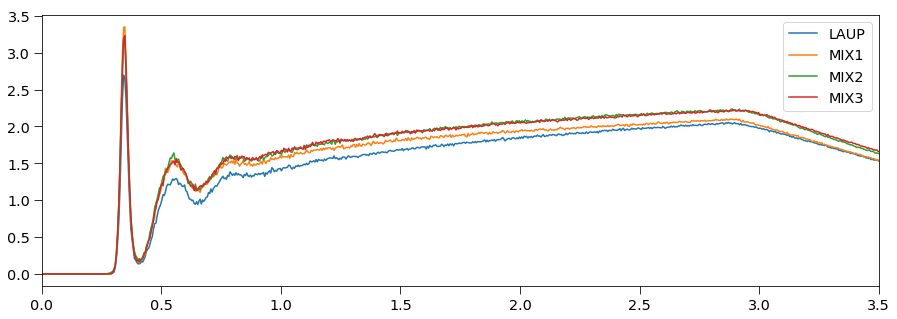

In [44]:
plt.errorbar(L[0], L[1], label='LAUP')
plt.errorbar(mix1RDF[0], mix1RDF[1], label='MIX1')
plt.errorbar(mix2RDF[0], mix2RDF[1], label='MIX2')
plt.errorbar(mix3RDF[0], mix3RDF[1], label='MIX3')
plt.legend(loc=1)
plt.xlim(0,3.5)

In [48]:
def removeOutliers(x, y, vx, vy):
    count = 0
    stdx = np.std(vx)
    meanx = np.mean(vx)
    stdy = np.std(vy)
    meany = np.mean(vy)
    val1 = 2*stdx + meanx
    val2 = 2*stdy + meany
    print(stdx)
    #print(meanx)
    #print(stdy)
    #print(meany)
    #print(len(x))
    #new_vx = []
    #new_vy = []
    for k in vx:
        #print(i)
        if k > val1:
            del vx[count]
            del vy[count]
            del x[count]
            del y[count]
            #print(len(x))
        count +=1
    count = 0
    for j in vy:
        if j > val2:
            del vx[count]
            del vy[count]
            del x[count]
            del y[count]
        count +=1
    return(x, y, vx, vy)

def getStreamlineInputs(traj, f, i, x_box, y_box, area, name):
    cSelect = traj.topology.select('name C1')
    c = traj.atom_slice(cSelect)
    coords = c.xyz
    initialFrame = coords[i-1]
    finalFrame = coords[f-1]
    px = []
    py = []
    vx = []
    vy = []
    ct = 0
    t = f-i
    for x, y, z in initialFrame:
        px.append(x*10)
        py.append(y*10)
        #vx.append((np.absolute(finalFrame[ct][0]-x)*10)/t)
        #vy.append((np.absolute(finalFrame[ct][1]-y)*10)/t)
        vx.append((finalFrame[ct][0]-x)*10/t)
        vy.append((finalFrame[ct][1]-y)*10/t)
        ct+=1
    ab, bc, cd, de = removeOutliers(px, py, vx, vy)
    ef, fg, gh, hi = interpolateStreamInputs(ab, bc, cd, de, x_box, y_box, area, name)
    #return a, b, c, d
    return ef, fg, gh, hi

def interpolateStreamInputs(x, y, u, v, xsize, ysize, area, name):
    nx, ny = xsize, ysize
    pts = np.vstack((x,y)).T
    vals = np.vstack((u,v)).T
    xi = np.linspace(np.min(x), np.max(x), nx)
    yi = np.linspace(np.min(y), np.max(y), ny)
    ipts = np.vstack(a.ravel() for a in np.meshgrid(yi, xi)[::-1]).T
    ivals = griddata(pts, vals, ipts, method = 'cubic')
    ui, vi = ivals.T
    ui.shape = vi.shape = (ny, nx)
    #plotStreamQuiver(xi, yi, ui, vi, area, name)
    return xi, yi, ui, vi

def plotStreamQuiver(X, Y, U, V, area, name):
    speed = np.sqrt(U*U + V*V)
    #print(speed)
    #print(np.max(X))
    #lw = speed/speed.max()
    #fig = plt.figure(figsize=(8,6.5))
    fig = plt.figure(figsize=(6, 6))
    ax1 = fig.add_subplot(111)
    
   # stm = ax1.streamplot(X, Y, U, V, linewidth=lw, cmap='nipy_spectral', density=1)
    #stm = ax1.streamplot(X, Y, U, V, linewidth=1.5, cmap='Greys', color=speed, density=2,  arrowstyle='fancy', arrowsize=1.5)
    #terrain
    stm = ax1.streamplot(X, Y, U, V, linewidth=1.5, color='black', density=2,  arrowstyle='fancy', arrowsize=1.5)
    #terrain
    
    
    #cbar = fig.colorbar(stm.lines, ticks=[0, 0.5, 1, 1.5, 2, 2.5])
    #cbar.set_clim(vmin=0, vmax=2)
    
    
    #plt.quiver(X, Y, U, V, headwidth = 8)
    plt.savefig(name+".png", dpi=300)
    #plt.figure(figsize=(6, 6))
    #plt.subplot(212)
    #pl2 = plt.quiver(X, Y, U, V, headwidth = 6, scale=40)
    plt.show()

In [50]:
from scipy import optimize
import scipy.linalg
from scipy.interpolate import griddata

In [99]:
fox, orange, pine, needle = getStreamlineInputs(traj3, len(traj3)-161, len(traj3)-162, 28, 28, '20', '/gpfs/amarolab/monolayers/MIX2_NaCl0.4_GMX/SA20_100ns/')

6.15201018845


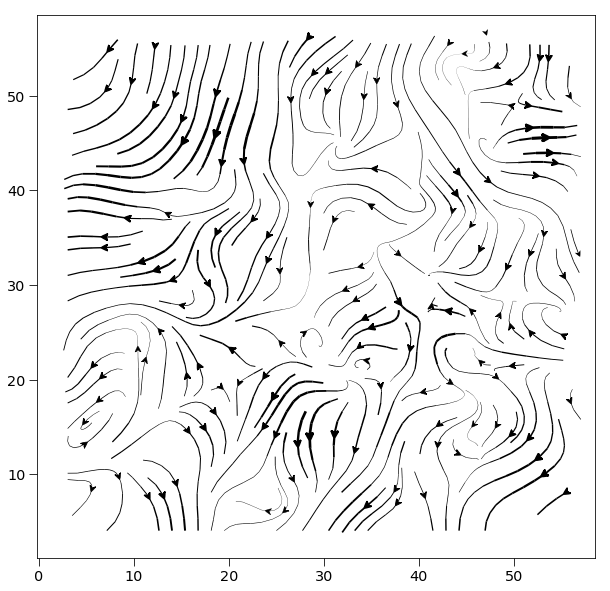

In [100]:
speed = np.sqrt(pine*pine + needle*needle)

plt.figure(figsize=(10,10))
#plt.quiver(fox, orange, pine, needle, color='k')


#plt.axis([-30,30,-30,30])
def speedtoLW(speed):
    return speed
def LWToSpeed(lw):
    return(lw - 0.5)*5
def makeStreamLegend(strm, lx, convertFunc, nlines=5, color='k', fmt='{:g}'):
    lws = np.array(strm.lines.get_linewidths())
    lx.axis('off')
    lx.set_xlim(0,1)
    lx.set_ylim(0,1)
    for p, q in enumerate(np.linspace(0.1, 0.9, nlines)):
        lw = lws.min()+float(p)*lws.ptp()/float(nlines-1)
        lx.axhline(q, 0.1, 0.4, c=color, lw=lw)
        lx.text(0.5, q, fmt.format(convertFunc(lw)), va='center')

plt.streamplot(fox, orange, pine, needle, color='k', linewidth=speed, arrowstyle='fancy', arrowsize=1.5, density=1.5)
plt.savefig('/home/adommer/Desktop/MIX3.png', dpi=300)

/home/adommer/.local/lib/python2.7/site-packages/MDAnalysis/topology/guessers.py:56: UserWarning: Failed to guess the mass for the following atom types: M
  "".format(', '.join(misses)))
/home/adommer/.local/lib/python2.7/site-packages/MDAnalysis/topology/guessers.py:56: UserWarning: Failed to guess the mass for the following atom types: M
  "".format(', '.join(misses)))
/home/adommer/.local/lib/python2.7/site-packages/MDAnalysis/topology/guessers.py:56: UserWarning: Failed to guess the mass for the following atom types: M
  "".format(', '.join(misses)))
/home/adommer/.local/lib/python2.7/site-packages/MDAnalysis/topology/guessers.py:56: UserWarning: Failed to guess the mass for the following atom types: M
  "".format(', '.join(misses)))
/home/adommer/.local/lib/python2.7/site-packages/MDAnalysis/topology/guessers.py:56: UserWarning: Failed to guess the mass for the following atom types: M
  "".format(', '.join(misses)))
/home/adommer/.local/lib/python2.7/site-packages/MDAnalysis/topol

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


ValueError: 'u' and 'v' must be of shape 'Grid(x,y)'

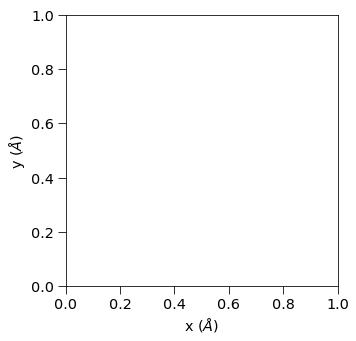

In [69]:
import MDAnalysis, MDAnalysis.visualization.streamlines

u1, v1, average_displacement, standard_deviation_of_displacement = MDAnalysis.visualization.streamlines.generate_streamlines('/gpfs/amarolab/monolayers/LAUP_NaCl0.4_GMX/SA20_100ns/step9_1.gro','/gpfs/amarolab/monolayers/LAUP_NaCl0.4_GMX/SA20_100ns/step9_1.trr',
            grid_spacing=10, MDA_selection='name C1', start_frame=2, end_frame=3,
            xmin=0, xmax= 60,
            ymin= 0, ymax=60,
            maximum_delta_magnitude=1.0, num_cores=16)
print(u1)
print(v1)
x = np.linspace(0, 60, 7)
y = np.linspace(0, 60, 7)
speed = np.sqrt(u1*u1 + v1*v1)
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlabel('x ($\AA$)')
ax.set_ylabel('y ($\AA$)')
ax.streamplot(x, y, u1, v1, density=(10,10))
fig.savefig('testing_streamline.png',dpi=300)